#Initialize

In [ ]:
!pip install git+https://github.com/mathialo/splinelib.git
from splinelib import *
import matplotlib.pyplot as plt
import inspect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mathialo/splinelib.git to /tmp/pip-req-build-ra6lyt8r
  Running command git clone --filter=blob:none --quiet https://github.com/mathialo/splinelib.git /tmp/pip-req-build-ra6lyt8r
  Resolved https://github.com/mathialo/splinelib.git to commit a9006c4783ac06e9f6c55bff8eb429219bf78598
  Preparing metadata (setup.py) ... done
  Created wheel for splinelib: filename=splinelib-0.1-py3-none-any.whl size=10275 sha256=bfcce05f49ef359c6480553a4c26af463415861fb7887382d838e21e12c757d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-joeu3ius/wheels/f4/c5/e3/2fa1546599b1c93cc4bef6416948d39508c9aeea646ff2b7f7
Successfully built splinelib


#Question 1

Fitting of the Runge function $f(x) = \frac{1}{1+25 x^2}$ in the interval [-1,1].

a) Generate 50 random data points from the function $f$ in the interval [-1,1], including the endpoints.

Compute the chord-length and centripetal parameters for those points.

b) Write a function to generate the knot vector for degree 3 using the **average** method (each interior knot is the average of 3 parameters).

(link: https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/INT-APP/PARA-knot-generation.html)

c) Apply least-squares curve fitting to $f$ (degree d=3) using average knots (number of interior knots: 45) and  **i.** uniform parameters, **ii.** chord length, **iii.** centripetal parameters.

For each fitting curve, compute and print the L2 error and plot the result.

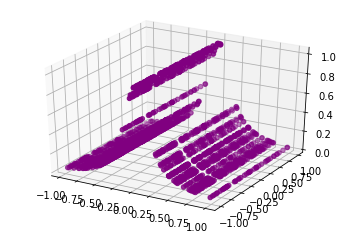

[0, 0, 0, 0.4166666666666667, 0.5833333333333334, 0.8055555555555557, 1, 1, 1, 1]


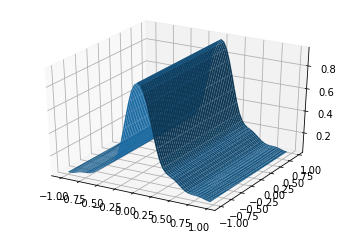

469.14741972190717


In [ ]:
# Question 1
import random
import numpy as np

##a.
def runge(x,y):  #function f
  return 1/(1+25*(x)**2 )

## Generate 50 random data points from the function  f  in the interval [-1,1]
num = 50 #data set
start = -1
end = 1
u = []
v = []
for j in range(num):
        u.append(random.uniform(start, end))
        v.append(random.uniform(start, end))

u[-1]= u[-1] - 1e-12 #make sure last point is inside the domain
v[-1]= v[-1] - 1e-12 #make sure last point is inside the domain


x, y = np.meshgrid(u,v)
f =  runge(x,y)
ax = plt.axes(projection='3d')
#ax.plot_wireframe(x,y,f)
ax.scatter(x,y,f,color='purple')
plt.show()


#Calculate the chord-length  centripetal parameters for those points:

# P.S: we use the diff method that returns a DataFrame with the difference between the values for each row and the previous row
ChordLength_parameter = sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))
#Calculate the centripetal parameters:
Centripetal_parameter = sum(np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2))

##b. Average method

def generate_knot_vector(prm, d):
    # Number of knots is equal to number of points + degree + 1 (m=n+p+1 based on the link from above)
    num_knots = len(prm) + d + 1

    # Initialize the knot vector with the first and last knots
    knot_vector = [0] * num_knots
    knot_vector[0] = prm[0]
    knot_vector[-1] = prm[-1]


    # Compute the interior knots as the average of 3 parameters
    for i in range(1, len(prm)-1):
        knot_vector[i+1] = (prm[i-1] + prm[i] + prm[i+1]) / 3
    for i in range(1,d):
      knot_vector[i]=0
    for i in range(num_knots-d-1,num_knots-1):
       knot_vector[i]=1

    return knot_vector

#Example to test from the given link
parameters = [0, 0.25, 0.3333333333333333, 0.6666666666666667, 0.75,1]
knot_vector_test = generate_knot_vector(parameters, 3)
print(knot_vector_test) # knot vector contains 10 elements

##c.

def myfit(ff, deg = 3, knots_u = 45, knots_v = 45, num_u = 50, num_v = 50 ) :
  global u1
  global v1
  u1 = np.linspace(-1,1,num_u)
  u1[-1]= u1[-1] - 1e-12 #make sure last point is inside the domain
  v1 = np.linspace(-1,1,num_v)
  v1[-1]= v1[-1] - 1e-12 #make sure last point is inside the domain
  x, y = np.meshgrid(u1,v1)
  f =  ff(x,y)
  #knots_x = np.asarray(generate_knot_vector(u, 3))
  #knots_y =np.asarray(generate_knot_vector(v, 3))
  knots_x = np.concatenate((-np.ones(deg), np.linspace(-1,1,knots_u+1,endpoint=False), np.ones(deg+1)))
  knots_y = np.concatenate((-np.ones(deg), np.linspace(-1,1,knots_v+1,endpoint=False), np.ones(deg+1)))
  # fitting a function
  ls = fit.least_squares_3d(u1,v1,f,knots_x, knots_y, deg) #Create a linear system and solve for the control points
  return ls

s = myfit(runge, 3, 10,10)
#plot the surface
x,y,z = s.evaluate_all()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z)
plt.show()

# A method to compute the l2 error
def ls_error(spline, fun, par_u, par_v):
  err = 0
  S = np.array([spline.evaluate(par_u[i], par_v[j]) for i in range(len(par_u)) for j in range(len(par_v))])
  F = np.array([fun(par_u[i], par_v[j]) for i in range(len(par_u)) for j in range(len(par_v))])
  return np.sum((S - F) * (S - F))
# to show the l2 error
print(ls_error(s,runge,u,v))











#Question 2

Apply least-squares surface fitting for the following surfaces, on uniform data:
- Sphere:  $f_1(x,y) = [ \cos(\pi x) \cos(2\pi y), \sin(\pi x) \cos(2\pi y), \sin(2 \pi y) ]$
- Torus: $f_2(x,y) = [ (3+\cos(2\pi y))\cos(2\pi x), (3+\cos(2\pi y)) \sin(2\pi x), \sin(2\pi y) ]$
- Cone: $f_3(x,y) = [ \cosh(2 \pi x) \cos(2\pi y), \cosh(2\pi x) \sin(2\pi y), \sinh(2\pi x) ]$

You can choose the polynomial degree and the knotvector.
Compute the L2-error and plot the result and the contol polygon.


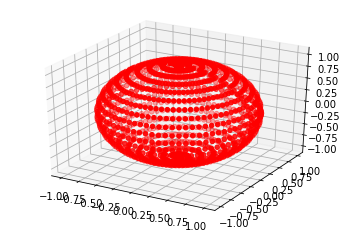

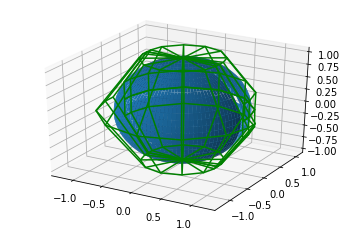

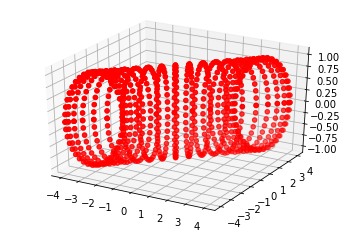

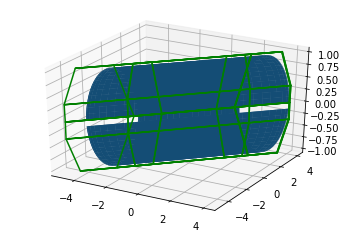

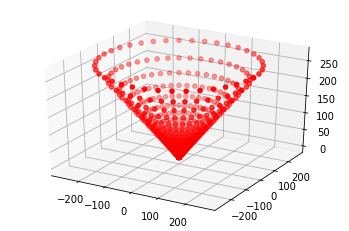

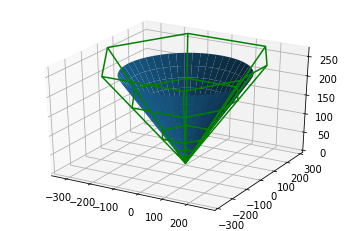

In [ ]:
#Question 2
#Based on the previous correction of the last Td(Surface data fitting):

def surface_fit(data, knots_u, knots_v, degree, par_u, par_v):
    D = data.shape[2]
    m1 = len(knots_u) - degree - 1
    m2 = len(knots_v) - degree - 1

    coefs = np.zeros([m1,m2,D])
    for i in range(D):
      coefs[:,:,i] = fit.least_squares_3d(par_u,par_v,
                     data[:,:,i],knots_u, knots_v, degree).get_coeffs()

    # Create space and resulting surface.
    space = TensorProductSplineSpace([
        SplineSpace(knots_u, degree),
        SplineSpace(knots_v, degree)
    ])
    return space.create_spline(coefs)

# for function 1 :f1

def f1(x,y):
  xx,yy=np.meshgrid(x,y)
  u=np.cos(np.pi*xx)*np.cos(2*np.pi*yy)
  v=np.sin(np.pi*xx)*np.cos(2*np.pi*yy)
  t=np.sin(2*np.pi*yy)
  return np.array([u,v,t]).T


u = np.linspace(0,1,40)
u[-1]= u[-1] - 1e-12 #make sure last point is inside the domain
v = np.linspace(0,1,40)
v[-1]= v[-1] - 1e-12 #make sure last point is inside the domain
pts = f1(u,v)
ax = plt.axes(projection='3d')
ax.scatter(pts[:,:,0],pts[:,:,1],pts[:,:,2],color='red')
plt.show()

knots_x = np.concatenate((-np.zeros(3), np.linspace(0,1,6,endpoint=False), np.ones(4)))
knots_y = np.concatenate((-np.zeros(3), np.linspace(0,1,6,endpoint=False), np.ones(4)))
s3 = surface_fit(pts, knots_x, knots_y, 3, u, v)
Spts = s3.evaluate_all()
ax = plt.axes(projection='3d')
ax.plot_surface(Spts[:,:,0],Spts[:,:,1],Spts[:,:,2])
cf = s3.get_coeffs()
ax.plot_wireframe(cf[:,:,0],cf[:,:,1],cf[:,:,2], color='green')
plt.show()

# for function 2 :f2

def f2(x,y):
  xx,yy=np.meshgrid(x,y)
  u=(3+ np.cos(2*np.pi*yy))*np.cos(2*np.pi*xx)
  v=(3+np.cos(2*np.pi*yy))*np.cos(2*np.pi*xx)
  t=np.sin(2*np.pi*yy)
  return np.array([u,v,t]).T


u = np.linspace(0,1,40)
u[-1]= u[-1] - 1e-12 #make sure last point is inside the domain
v = np.linspace(0,1,40)
v[-1]= v[-1] - 1e-12 #make sure last point is inside the domain
pts = f2(u,v)
ax = plt.axes(projection='3d')
ax.scatter(pts[:,:,0],pts[:,:,1],pts[:,:,2],color='red')
plt.show()

knots_x = np.concatenate((-np.zeros(3), np.linspace(0,1,6,endpoint=False), np.ones(4)))
knots_y = np.concatenate((-np.zeros(3), np.linspace(0,1,6,endpoint=False), np.ones(4)))
s3_2 = surface_fit(pts, knots_x, knots_y, 3, u, v)
Spts = s3_2.evaluate_all()
ax = plt.axes(projection='3d')
ax.plot_surface(Spts[:,:,0],Spts[:,:,1],Spts[:,:,2])
cf = s3_2.get_coeffs()
ax.plot_wireframe(cf[:,:,0],cf[:,:,1],cf[:,:,2], color='green')
plt.show()

# for function 3 :f3
def f3(x,y):
  xx,yy=np.meshgrid(x,y)
  u=np.cosh(2*np.pi*xx)*np.cos(2*np.pi*yy)
  v=np.cosh(2*np.pi*xx)*np.sin(2*np.pi*yy)
  t=np.sinh(2*np.pi*xx)
  return np.array([u,v,t]).T


u = np.linspace(0,1,40)
u[-1]= u[-1] - 1e-12 #make sure last point is inside the domain
v = np.linspace(0,1,40)
v[-1]= v[-1] - 1e-12 #make sure last point is inside the domain
pts = f3(u,v)
ax = plt.axes(projection='3d')
ax.scatter(pts[:,:,0],pts[:,:,1],pts[:,:,2],color='red')
plt.show()

knots_x = np.concatenate((-np.zeros(3), np.linspace(0,1,6,endpoint=False), np.ones(4)))
knots_y = np.concatenate((-np.zeros(3), np.linspace(0,1,6,endpoint=False), np.ones(4)))
s3_3 = surface_fit(pts, knots_x, knots_y, 3, u, v)
Spts = s3_3.evaluate_all()
ax = plt.axes(projection='3d')
ax.plot_surface(Spts[:,:,0],Spts[:,:,1],Spts[:,:,2])
cf = s3_3.get_coeffs()
ax.plot_wireframe(cf[:,:,0],cf[:,:,1],cf[:,:,2], color='green')
plt.show()

